In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import plotly.graph_objects as go
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/heart_disease_uci.csv')

In [ ]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


Some feature transformations

In [ ]:
df.dropna(inplace=True)

In [ ]:
X = df.drop('num', axis=1)
Y = (df['num'] > 0) * 1

In [ ]:
X.drop('id', axis=1, inplace=True)
X.drop('dataset', axis=1, inplace=True)

In [ ]:
X['sex'] = (X['sex'] == 'Male')*1
X['fbs'] = X['fbs']*1
X['exang'] = X['exang']*1

In [ ]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,63,1,typical angina,145.0,233.0,1,lv hypertrophy,150.0,0,2.3,downsloping,0.0,fixed defect
1,67,1,asymptomatic,160.0,286.0,0,lv hypertrophy,108.0,1,1.5,flat,3.0,normal
2,67,1,asymptomatic,120.0,229.0,0,lv hypertrophy,129.0,1,2.6,flat,2.0,reversable defect
3,37,1,non-anginal,130.0,250.0,0,normal,187.0,0,3.5,downsloping,0.0,normal
4,41,0,atypical angina,130.0,204.0,0,lv hypertrophy,172.0,0,1.4,upsloping,0.0,normal


In [ ]:
categorical_columns = ['cp', 'restecg', 'slope', 'thal']

Train Validation Test Split

In [ ]:
def train_test_val_split(X, Y, test_size=0.2, val_size=0.2):
  X_temp, X_test, y_temp, y_test = train_test_split(X, Y, test_size=test_size, random_state=42)

  val_size = val_size / (1 - test_size)

  X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=val_size, random_state=42)

  return X_train, X_val, X_test, y_train, y_val, y_test

In [ ]:
X_train, X_val, X_test, y_train, y_val, y_test = train_test_val_split(X, Y)

One Hot Encoding for Categorical Features  
Fit the Transformer on Training Data and use to Transform Validation and Test Data

In [ ]:
transformer = make_column_transformer(
    (OneHotEncoder(), categorical_columns),
    remainder='passthrough')

In [ ]:
transformed = transformer.fit_transform(X_train)
X_train = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())

In [ ]:
X_train.head()

,onehotencoder__cp_asymptomatic,onehotencoder__cp_atypical angina,onehotencoder__cp_non-anginal,onehotencoder__cp_typical angina,onehotencoder__restecg_lv hypertrophy,onehotencoder__restecg_normal,onehotencoder__restecg_st-t abnormality,onehotencoder__slope_downsloping,onehotencoder__slope_flat,onehotencoder__slope_upsloping,...,onehotencoder__thal_reversable defect,remainder__age,remainder__sex,remainder__trestbps,remainder__chol,remainder__fbs,remainder__thalch,remainder__exang,remainder__oldpeak,remainder__ca
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,60,1,145.0,282.0,0,142.0,1,2.8,2.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,48,1,122.0,222.0,0,186.0,0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,66,1,160.0,228.0,0,138.0,0,2.3,0.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,69,1,160.0,234.0,1,131.0,0,0.1,1.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,42,1,140.0,226.0,0,178.0,0,0.0,0.0


In [ ]:
val_transformed = transformer.transform(X_val)
X_val = pd.DataFrame(val_transformed, columns=transformer.get_feature_names_out())

In [ ]:
test_transformed = transformer.transform(X_test)
X_test = pd.DataFrame(test_transformed, columns=transformer.get_feature_names_out())

Logistic Regression  
Use GridSearch to find best estimator

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1],
              'penalty': ['l1', 'l2', None],
              'solver': ['lbfgs', 'liblinear', 'newton-cg']}

In [ ]:
log_reg_gs = LogisticRegression()
grid_search = GridSearchCV(log_reg_gs, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_score_

0.8384126984126985

In [ ]:
best_estimator = grid_search.best_estimator_
y_pred = best_estimator.predict(X_test)
lg_test_accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print("Best Logistic Regression Model Parameters:", grid_search.best_params_)
print("Accuracy on Test Data:", lg_test_accuracy)

Best Logistic Regression Model Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy on Test Data: 0.8833333333333333


Normalize data using standard normalization

In [ ]:
columns_to_normalize = [column for column in X_train.columns if not column.startswith('onehotencoder')]

In [ ]:
normalizer_transformer = make_column_transformer(
    (StandardScaler(), columns_to_normalize),
    remainder='passthrough')

In [ ]:
normalized_train = normalizer_transformer.fit_transform(X_train)
X_train_normalized = pd.DataFrame(normalized_train, columns=X_train.columns)

In [ ]:
X_train_normalized.head()

,onehotencoder__cp_asymptomatic,onehotencoder__cp_atypical angina,onehotencoder__cp_non-anginal,onehotencoder__cp_typical angina,onehotencoder__restecg_lv hypertrophy,onehotencoder__restecg_normal,onehotencoder__restecg_st-t abnormality,onehotencoder__slope_downsloping,onehotencoder__slope_flat,onehotencoder__slope_upsloping,...,onehotencoder__thal_reversable defect,remainder__age,remainder__sex,remainder__trestbps,remainder__chol,remainder__fbs,remainder__thalch,remainder__exang,remainder__oldpeak,remainder__ca
0,0.566991,0.648564,0.715049,0.622321,-0.421464,-0.347286,1.324329,1.486067,1.332399,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.706959,0.648564,-0.606251,-0.467476,-0.421464,1.655076,-0.7551,-0.89811,-0.741509,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.203965,0.648564,1.576767,-0.358497,-0.421464,-0.529319,-0.7551,1.060321,-0.741509,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.522453,0.648564,1.576767,-0.249517,2.372684,-0.847877,-0.7551,-0.812961,0.295445,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-1.343934,0.648564,0.42781,-0.394823,-0.421464,1.29101,-0.7551,-0.89811,-0.741509,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
normalized_val = normalizer_transformer.fit_transform(X_val)
X_val_normalized = pd.DataFrame(normalized_val, columns=X_val.columns)

In [ ]:
normalized_test = normalizer_transformer.fit_transform(X_test)
X_test_normalized = pd.DataFrame(normalized_test, columns=X_test.columns)

In [ ]:
log_reg_normalized = LogisticRegression()
grid_search = GridSearchCV(log_reg_normalized, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train_normalized, y_train)

In [ ]:
grid_search.best_score_

0.8438095238095238

In [ ]:
best_estimator_normalized = grid_search.best_estimator_
y_pred = best_estimator_normalized.predict(X_test_normalized)
lg_normalized_test_accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print("Best Logistic Regression Model Parameters:", grid_search.best_params_)
print("Accuracy on Normalized Test Data:", lg_normalized_test_accuracy)

Best Logistic Regression Model Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy on Normalized Test Data: 0.8666666666666667


Neural Network

In [ ]:
param_grid_net = {
    'hidden_layer_sizes': [(50,), (100,), (100, 64), (124, 64), (64, 32), (100, 36)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
}

In [ ]:
mlp = MLPClassifier(max_iter=1000)
grid_search_mlp = GridSearchCV(mlp, param_grid_net, cv=5)
grid_search_mlp.fit(X_train, y_train)

In [ ]:
best_mlp = grid_search_mlp.best_estimator_

In [ ]:
grid_search_mlp.best_params_

{'activation': 'relu',
 'alpha': 0.01,
 'hidden_layer_sizes': (100,),
 'solver': 'adam'}

In [ ]:
y_pred_test = best_mlp.predict(X_test)
net_test_accuracy = accuracy_score(y_test, y_pred_test)

In [ ]:
print("Best Neural Network Parameters:", grid_search.best_params_)
print("Accuracy on Test Data:", net_test_accuracy)

Best Neural Network Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy on Test Data: 0.8


In [ ]:
mlp_normalized = MLPClassifier(max_iter=1000)
grid_search_mlp = GridSearchCV(mlp_normalized, param_grid_net, cv=5)
grid_search_mlp.fit(X_train_normalized, y_train)

In [ ]:
best_mlp_normalized = grid_search_mlp.best_estimator_

In [ ]:
y_pred_test = best_mlp.predict(X_test_normalized)
net_normalized_test_accuracy = accuracy_score(y_test, y_pred_test)

In [ ]:
print("Best Neural Network Parameters:", grid_search.best_params_)
print("Accuracy on Normalized Test Data:", net_normalized_test_accuracy)

Best Neural Network Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy on Normalized Test Data: 0.5666666666666667


Comparison of Model Accuracies

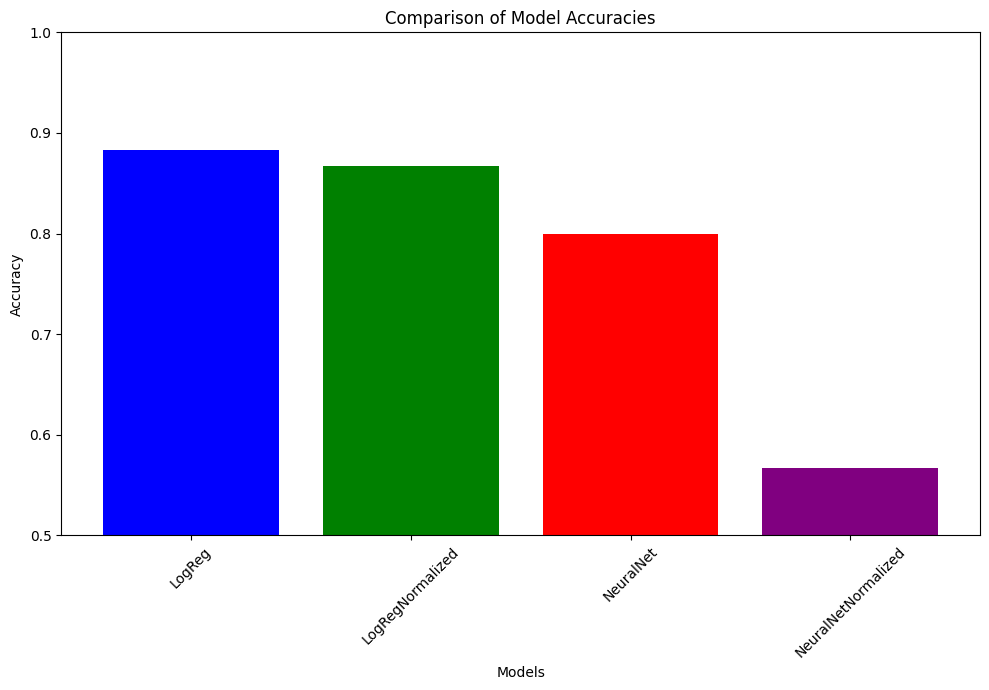

In [ ]:
import matplotlib.pyplot as plt
accuracies = [lg_test_accuracy, lg_normalized_test_accuracy, net_test_accuracy, net_normalized_test_accuracy]
models = ['LogReg', 'LogRegNormalized', 'NeuralNet', 'NeuralNetNormalized']
plt.figure(figsize=(10, 7))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim([0.5, 1])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
